In [2]:
# Useful functions for field line integration
# Code developed by Dr. Chris Smiet
#

import os, sys, inspect       # For importing the submodules in a platform-independend robust way
# Make sure that the path to BlenDaViz and the integration library are in the front of the path.
code_folder = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile( inspect.currentframe() ))[0],".")))
if code_folder not in sys.path:
     sys.path.insert(0, code_folder)

import numpy as np
import matplotlib.pyplot as plt
from functools import partial  # create new funtions from old functions (and strip the kwargs)
from scipy.integrate import odeint
import cmath 
import sympy as sym


def random_three_vector():
    """
    Generates a random 3D unit vector (direction) with a uniform spherical distribution
    Algo from http://stackoverflow.com/questions/5408276/python-uniform-spherical-distribution
    :return:
    """
    phi = np.random.uniform(0,np.pi*2)
    costheta = np.random.uniform(-1,1)
    theta = np.arccos( costheta )
    x = np.sin( theta) * np.cos( phi )
    y = np.sin( theta) * np.sin( phi )
    z = np.cos( theta )
    return np.array((x,y,z))

def Kedia_32(xx):
    '''
    Vector field whose integral curves lie on knotted trefoil surfaces
    See Kedia et al. 10.1103/PhysRevLett.111.150404
    '''
    vv = np.zeros(3)
    vv[0] = (192*(2*xx[0]**5*xx[1] + xx[0]**3*xx[1]*(-1 + xx[2]**2) - 2*xx[1]**2*xx[2]*(-1 + xx[1]**2 + xx[2]**2) + 2*xx[0]**2*xx[2]*(-1 + 3*xx[1]**2 + xx[2]**2) - xx[0]*xx[1]*(1 + 2*xx[1]**4 - 6*xx[2]**2 + xx[2]**4 + 3*xx[1]**2*(-1 + xx[2]**2))))/(1 + xx[0]**2 + xx[1]**2 + xx[2]**2)**6

    vv[1] = -((96*(xx[0]**6 + 12*xx[0]**3*xx[1]*xx[2] - 4*xx[0]*xx[1]*xx[2]*(2 + xx[1]**2 - 2*xx[2]**2) + xx[0]**4*(-2 - 5*xx[1]**2 + 2*xx[2]**2) + xx[1]**2*(-1 + xx[1]**4 + 6*xx[2]**2 - xx[2]**4) + xx[0]**2*(1 - 5*xx[1]**4 - 6*xx[2]**2 + xx[2]**4 - 6*xx[1]**2*(-1 + xx[2]**2))))/(1 + xx[0]**2 + xx[1]**2 + xx[2]**2)**6)

    vv[2] = -((192*(xx[0]**5 - 3*xx[0]**4*xx[1]*xx[2] + xx[0]**2*xx[1]*xx[2]*(9 - 2*xx[1]**2 - 3*xx[2]**2) + xx[1]**3*xx[2]*(-3 + xx[1]**2 + xx[2]**2) + xx[0]**3*(-1 - 2*xx[1]**2 + 3*xx[2]**2) - 3*xx[0]*xx[1]**2*(-1 + xx[1]**2 + 3*xx[2]**2)))/(1 + xx[0]**2 + xx[1]**2 + xx[2]**2)**6)
    return vv/np.sum(np.sqrt(vv**2))

def Kedia_32_curl(xx):
    '''
    Vector field whose integral curves lie on knotted trefoil surfaces
    See Kedia et al. 10.1103/PhysRevLett.111.150404
    '''
    vv = np.zeros(3)
    vv[0] = (1/((1 + xx[0]**2 + xx[1]**2 + xx[2]**2)**7))*192*(-24*xx[0]*xx[1]*(4 + 5*xx[0]**2 + xx[1]**2) - 24*(xx[0]**4 - 2*xx[1]**2 + xx[0]**2*(2 - 3*xx[1]**2))*xx[2] + 4*(2*xx[0]*xx[1]*(13 + 5*xx[0]**2 - xx[1]**2) + 7*(xx[0] - xx[1])*(xx[0] + xx[1])*xx[2])*(1 + xx[0]**2 + xx[1]**2 + xx[2]**2) - (18*xx[0]*xx[1] + xx[0]**2*xx[2] - xx[1]**2*xx[2])*(1 + xx[0]**2 + xx[1]**2 + xx[2]**2)**2)

    vv[1] = (1/((1 + xx[0]**2 + xx[1]**2 + xx[2]**2)**7))*192*(-24*(xx[0]**4 + xx[0]**2*(2 + 3*xx[1]**2) - 2*(xx[1]**2 + xx[1]**4) + xx[0]**3*xx[1]*xx[2] - xx[0]*xx[1]*(4 + 3*xx[1]**2)*xx[2]) + 2*(xx[0]**4 - 26*xx[1]**2 - 7*xx[1]**4 + 2*xx[0]**2*(13 + 9*xx[1]**2) - 28*xx[0]*xx[1]*xx[2])*(1 + xx[0]**2 + xx[1]**2 + xx[2]**2) - (9*xx[0]**2 - 9*xx[1]**2 - 2*xx[0]*xx[1]*xx[2])*(1 + xx[0]**2 + xx[1]**2 + xx[2]**2)**2)

    vv[2] = (1/((1 + xx[0]**2 + xx[1]**2 + xx[2]**2)**7))*192*(xx[0]*(xx[0]**2 - 3*xx[1]**2)*(-11 + xx[0]**2 + xx[1]**2)*(-1 + xx[0]**2 + xx[1]**2) - 2*xx[1]*(-3*xx[0]**2 + xx[1]**2)*(-17 + 7*xx[0]**2 + 7*xx[1]**2)*xx[2] + 2*xx[0]*(xx[0]**2 - 3*xx[1]**2)*(-18 + xx[0]**2 + xx[1]**2)*xx[2]**2 - 14*xx[1]*(-3*xx[0]**2 + xx[1]**2)*xx[2]**3 + xx[0]*(xx[0]**2 - 3*xx[1]**2)*xx[2]**4)
    return vv/np.sum(np.sqrt(vv**2))
def lorentz(X, t):
    """
    Field line integration, Baby!
    Arguments:
    *X*:
        array of the shape [x, y, z, vx, vy, vz]
    *t*:
        time dependence of this function (needed for call signature of odeint
    *Bscale (given to it as args=(Bscale, ) tuple in call of odeint
    """
    xx = X[:3]
    B = fn(xx)
    v = X[3:]
    drdt = v
    dvdt = q_over_m * (np.cross(v, B))  # No electric fields :D
    return np.hstack((drdt, dvdt))


def calc_trajectory(r0=np.array((0., 0., 0.)), v0=None, Energy=10., tf=1e-5, N=100):
    """Calculate the particle's trajectory.

    q, m are the particle charge and mass;
    x0 and v0 are its initial position and velocity vectors.
    tf final time of integration in seconds.
    Energy in KeV.
    N  number of points along the way
    If v0 is not specified, it is that of a 1 KeV electron.
    All parameters are given in SI units

    """
    if v0 is None:
        direction = random_three_vector()
        v0 = direction * 439284.264 *np.sqrt(Energy/mass)  # speed of electron in m/s
    # Final time, number of time steps, time grid.
    if N is None:
        N = 10 * tf/1e-6  # make ten points per microsecond
    t = np.linspace(0, tf, N)
    # Initial positon and velocity components.
    X0 = np.hstack((r0, v0))
    print('starting integration from position: {} with speed: {}'.format(r0, v0))
    X = odeint(lorentz, X0, t, hmax= 0.05, rtol=1e-10)
    return X


def fieldline(start=np.array([np.random.random_sample(),0,0]), field=Kedia_32, N=100, tf=100):
    numargs = len(inspect.signature(field).parameters)
    if numargs == 1:
        # replace with function with proper call signature
        print('adding time dependence to the function')
        placeholder = field
        field = lambda xx, t: placeholder(xx)
    elif numargs > 2:
        print("Error: function call signature takes too many arguments")
        raise TypeError
    print(start)
    print(field(start, 0))
    t = np.linspace(0, tf, N)
    X = odeint(field, start, t, hmax=0.05, rtol=1e-10)
    return X

MyFieldLine = fieldline()

adding time dependence to the function
[0.32875071 0.         0.        ]
[ 0.         -0.57564795  0.42435205]


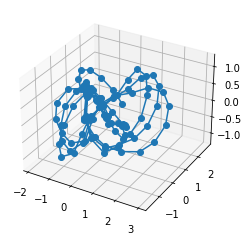

In [3]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(MyFieldLine[:,0], MyFieldLine[:,1], zs=MyFieldLine[:,2], marker = 'o')

In [8]:
def fieldline2(start=np.array([np.random.random_sample(),0,0]), field=Kedia_32_curl, N=100, tf=100):
    numargs = len(inspect.signature(field).parameters)
    if numargs == 1:
        # replace with function with proper call signature
        print('adding time dependence to the function')
        placeholder = field
        field = lambda xx, t: placeholder(xx)
    elif numargs > 2:
        print("Error: function call signature takes too many arguments")
        raise TypeError
    print(start)
    print(field(start, 0))
    t = np.linspace(0, tf, N)
    X = odeint(field, start, t, hmax=0.05, rtol=1e-10)
    return X

MyFieldLine2 = fieldline2()

adding time dependence to the function
[0.99130453 0.         0.        ]
[0.         0.15909834 0.84090166]


In [10]:
MyFieldLine.shape

(100, 3)

In [11]:
MyFieldLine2.shape

(100, 3)

In [14]:
dotProduct=(MyFieldLine[:,0]*MyFieldLine2[:,0])+(MyFieldLine[:,1]*MyFieldLine2[:,1])+(MyFieldLine[:,2]*MyFieldLine2[:,2])

In [17]:
bottom= np.sqrt(MyFieldLine[:,0]**2 + MyFieldLine[:,1]**2 + MyFieldLine[:,2]**2) * np.sqrt(MyFieldLine2[:,0]**2+MyFieldLine2[:,1]**2+MyFieldLine2[:,2]**2)

In [19]:
y=np.arccos(dotProduct/bottom)

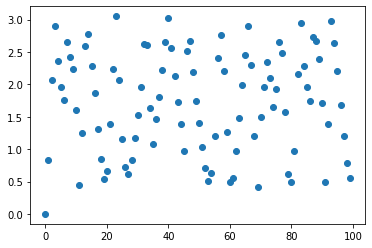

In [24]:
plt.scatter(np.arange(0,100,1), y)

In [25]:
print(y)

[0.         0.83262933 2.06729397 2.90377469 2.35294307 1.96577655
 1.75636546 2.6468946  2.42275178 2.23401509 1.60767734 0.45015558
 1.25272723 2.58670296 2.77395013 2.28772388 1.86060508 1.30850154
 0.85323311 0.53911056 0.66406875 1.3835131  2.23865266 3.05091269
 2.06526649 1.15773645 0.72958292 0.61692239 0.83017615 1.16656154
 1.52684718 1.95120964 2.62757179 2.59970508 1.62859633 1.08232229
 1.47068206 1.80942738 2.21436684 2.65549775 3.0223472  2.56393346
 2.13063533 1.73236335 1.39294202 0.96755624 2.51204894 2.66958044
 2.18856047 1.74511113 1.40042381 1.03336929 0.70675976 0.50899405
 0.62569373 1.19624683 2.40911926 2.76613258 2.20266372 1.26367723
 0.49085821 0.56179683 0.97393219 1.47616661 1.98525456 2.44611621
 2.90531082 2.29161594 1.19500182 0.42105131 1.50250669 1.9623613
 2.34373684 2.09360424 1.64386356 1.92407527 2.65536824 2.48460324
 1.56625213 0.62148575 0.4851995  0.96761473 2.16357108 2.95204474
 2.27827326 1.95407747 1.73607678 2.7281436  2.66480212 2.39374